In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import keras
import argparse
import warnings
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util

In [20]:
img = image.load_img(r'c:\Users\Karan Mehta\Downloads\piyush project\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_105102_cell_87.png')

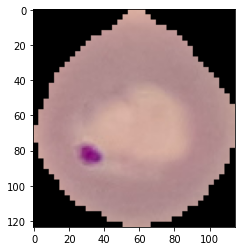

In [21]:
plt.imshow(img)

In [22]:
cv2.imread(r'c:\Users\Karan Mehta\Downloads\piyush project\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_105102_cell_87.png')

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [24]:
cv2.imread(r'c:\Users\Karan Mehta\Downloads\piyush project\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_105102_cell_87.png').shape

(124, 115, 3)

In [25]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [27]:
train_dataset = train.flow_from_directory(r'C:\Users\Karan Mehta\Downloads\piyush project\cell_images',
                                                target_size=(124,136),
                                                batch_size = 50,
                                                class_mode = 'binary')

Found 26622 images belonging to 2 classes.


In [29]:
validation_dataset = train.flow_from_directory(r'C:\Users\Karan Mehta\Downloads\piyush project\Validation',
                                               target_size=(124,136),
                                               batch_size = 50,
                                               class_mode = 'binary')

Found 936 images belonging to 2 classes.


In [30]:
train_dataset.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [31]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [38]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape=(124,136,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512,activation='relu'),
                                   ##
                                   tf.keras.layers.Dense(1,activation='sigmoid')
                                   ])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 122, 134, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 61, 67, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 59, 65, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 29, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 27, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 15, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12480)            

In [40]:
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(lr=0.001),
             metrics =['accuracy'])

In [41]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 32,
                     epochs = 50,
                     validation_data = validation_dataset)

Epoch 1/50
32/32 [==============================] - 14s 420ms/step - loss: 1.9315 - accuracy: 0.5491 - val_loss: 0.6693 - val_accuracy: 0.6816
Epoch 2/50
32/32 [==============================] - 13s 398ms/step - loss: 0.6827 - accuracy: 0.5859 - val_loss: 0.6857 - val_accuracy: 0.5267
Epoch 3/50
32/32 [==============================] - 13s 393ms/step - loss: 0.6680 - accuracy: 0.5988 - val_loss: 0.5440 - val_accuracy: 0.7596
Epoch 4/50
32/32 [==============================] - 13s 396ms/step - loss: 0.6378 - accuracy: 0.6454 - val_loss: 0.4675 - val_accuracy: 0.7842
Epoch 5/50
32/32 [==============================] - 13s 413ms/step - loss: 0.5209 - accuracy: 0.7591 - val_loss: 0.3652 - val_accuracy: 0.8814
Epoch 6/50
32/32 [==============================] - 13s 415ms/step - loss: 0.4045 - accuracy: 0.8660 - val_loss: 0.2098 - val_accuracy: 0.9209
Epoch 7/50
32/32 [==============================] - 14s 440ms/step - loss: 0.3361 - accuracy: 0.8824 - val_loss: 0.1876 - val_accuracy: 0.9370

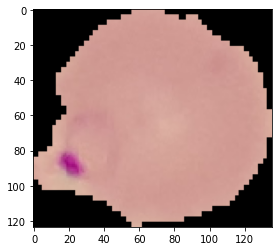

Parasitized


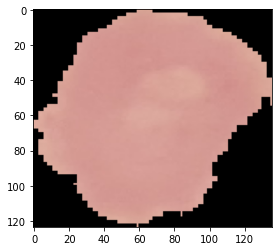

Uninfected


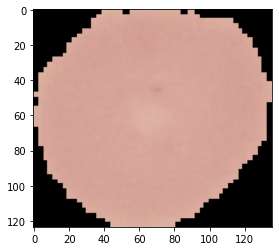

Uninfected


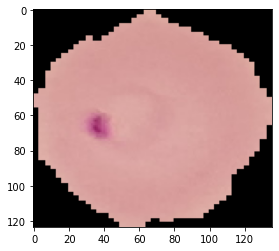

Parasitized


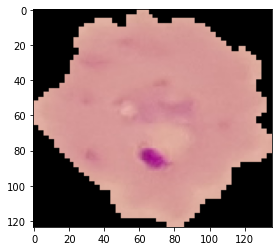

Parasitized


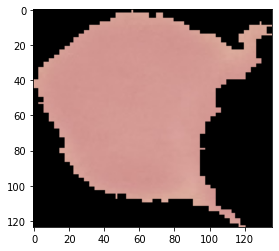

Uninfected


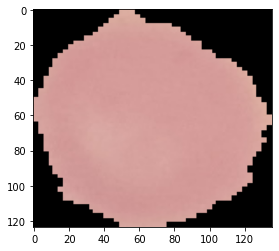

Uninfected


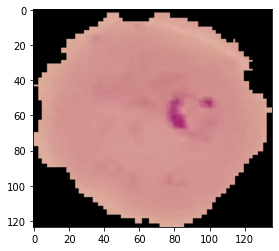

Parasitized


In [42]:
dir_path = (r'C:\Users\Karan Mehta\Downloads\piyush project\test')

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'/'+ i, target_size = (124,136))
    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    images = np.vstack([x])
    val = model.predict(images)
    if val == 0:
        print("Parasitized")
    else:
        print("Uninfected")

In [43]:
best_model_accuracy = model_fit.history['accuracy'][np.argmin(model_fit.history['loss'])]

In [44]:
best_model_accuracy

0.9631249904632568